# 統計指標實作範例
## 常見於迴歸問題的評估指標
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)

## 常見於分類問題的指標
* Binary Cross Entropy (CE)

##### 後面的課程還會有更詳細的說明

In [21]:
import numpy as np
import matplotlib.pyplot as plt

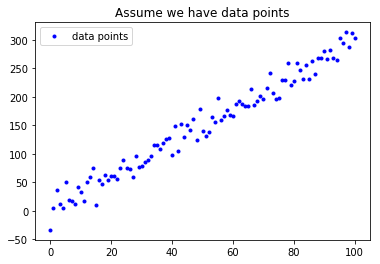

In [37]:
w = 3
b = 0.5

x_lin = np.linspace(0, 100, 101) #linspace(起始值, 結束值, 要在起始值和結束值之間產生多少個數),linspace是產生等差數列的一個函式
# x_lin = np.linspace(0, 100, num = 101) #這種比較規矩是的寫法

y = (x_lin + np.random.randn(101) * 5) * w + b #randn函式他會回傳一個或者是一組具有標準常態分佈的數值

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2) #location = loc (參數可以用best,會依造你的圖框大小選擇一個最好的位置)
plt.show()

In [23]:
#這裡為自己測試用的
nprandom = np.random.randn(101) #randn函式他會回傳一個或者是一組具有標準常態分佈的數值
nprandom5 = nprandom*5
print(nprandom)
print(nprandom5)

[ 0.43493923  1.27560858  0.64603102  1.22161221  0.53780697  1.41516097
 -1.18710716 -0.49405279  1.18476316 -1.10871394  0.91255031 -1.04646816
 -0.7139646   0.51652625 -0.05126629  0.4166646  -0.01879138 -0.91740549
 -1.39179752  0.15605336  1.16648954  0.46102107 -1.35840045 -0.82962882
 -0.08256071  0.01439055  0.12029765  0.2437642   0.46928483  0.5996687
 -1.01521029  0.57645074  0.18844809  0.20714643  0.64155401  1.08790379
  1.43947277  0.46145605  0.20565833 -1.32808463  0.98935958  1.33741109
 -0.86851677 -2.1634477   0.20843007 -0.28380615  0.0180668  -0.93408711
 -0.52359914  0.27151753  0.23999868 -0.72293572  0.41777747 -1.15606712
 -0.36421131  1.08150337  0.39816867 -1.61681743  0.90120247  0.75501546
  0.38035029 -1.290426   -0.94407704 -1.12992796 -0.38421944 -0.22186821
  0.0672658  -1.05679714  0.56215362 -0.38691961  0.09862037 -1.04273837
 -0.16911789 -0.34512917  0.72588487  0.43224127  0.1684137  -0.92909784
  1.31883222  0.4466159   0.81188952  1.13073476  0.

In [8]:
#這裡為自己測試用的
print(x_lin)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100.]


In [9]:
#這裡為自己測試用的
print(y)

[ 17.48559417 -23.3146882   18.3966427    4.28890136  14.88201127
   9.41849118  21.8666308   10.16214441  34.29582835  26.39998398
  59.49983525  15.73826074  58.66345313  39.10957572  47.04592697
  37.72339869  74.22993629  61.36575634  72.88789804  57.64450606
  43.56613957  57.71593582  91.98580267  52.06333787  66.55984399
  71.72121201  82.1315861   51.7766735   74.41599802  77.83670967
  93.29850436  87.99649818  76.62338877 102.07270143 104.03372661
  87.32843786 113.39512857 141.82125638  88.65683329 127.9085704
 118.13662162 119.14545522 120.30573375 158.10288    118.17148393
 149.16190573 151.35755829 145.93906457 146.36397235 132.46409117
 167.28556069 169.50669772 177.51550467 177.22297433 176.71412276
 155.48655754 183.98129109 162.56259647 152.15632202 174.93218571
 162.25785858 198.75162953 176.65489254 179.5311275  192.97361594
 207.15180697 201.78787653 227.77637493 193.27238753 197.83842509
 219.06376768 216.83135569 203.8926023  220.53461496 234.32821232
 253.559285

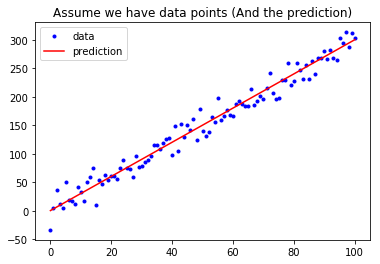

[  0.5   3.5   6.5   9.5  12.5  15.5  18.5  21.5  24.5  27.5  30.5  33.5
  36.5  39.5  42.5  45.5  48.5  51.5  54.5  57.5  60.5  63.5  66.5  69.5
  72.5  75.5  78.5  81.5  84.5  87.5  90.5  93.5  96.5  99.5 102.5 105.5
 108.5 111.5 114.5 117.5 120.5 123.5 126.5 129.5 132.5 135.5 138.5 141.5
 144.5 147.5 150.5 153.5 156.5 159.5 162.5 165.5 168.5 171.5 174.5 177.5
 180.5 183.5 186.5 189.5 192.5 195.5 198.5 201.5 204.5 207.5 210.5 213.5
 216.5 219.5 222.5 225.5 228.5 231.5 234.5 237.5 240.5 243.5 246.5 249.5
 252.5 255.5 258.5 261.5 264.5 267.5 270.5 273.5 276.5 279.5 282.5 285.5
 288.5 291.5 294.5 297.5 300.5]


In [38]:
w = 3
b = 0.5

y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')   #這裡為y軸
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')  #這裡為x軸
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

print(y_hat)

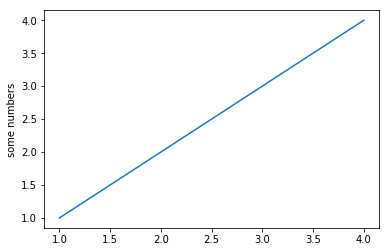

In [18]:
#這裡為自己測試用
import matplotlib.pyplot as plt
plt.plot([1,2,3,4],[1,2,3,4])     #plot(他會顯示1~4的座標point)沒有定義的話都會從0開始到3總共有四個數字
plt.ylabel('some numbers')
plt.show()

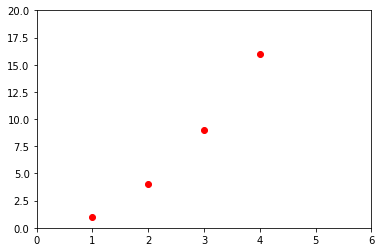

In [2]:
#這裡為自己測試用
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0,6,0,20]) #axis([xmin,xmax,ymin,ymax])
plt.show()

In [46]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    #print(y)
    #print(yp)
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

MAE = mean_absolute_error(y, y_hat)
print("The Mean absolute error is %.3f" % (MAE))

The Mean absolute error is 12.198


In [45]:
#這裡為測試用
import math
def mean_squared_error(y, yp):
    """
    請完成這個 Function 後往下執行
    計算MSE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mse: MSE
    """
    mse = MSE = sum((y - yp)** 2) / len(y)
    return mse

MSE = mean_squared_error(y, y_hat)
print("The Mean squred error is %.3f" % (MSE))

The Mean squred error is 233.462


## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)